# Business metrics analysis for an entertainment app.

**Research task:**
Identify the reasons for the company’s losses, despite the huge investment in ads and help the company turn a profit. 

**What we have:**

data about users, referred from May 1 to October 27 2019, a server log with data on their visits, purchases during this period and advertising costs. 

**Research goal:**
- where users come from and what devices they use
- how much it costs to attract users from different advertising channels
- how much money each user brings in,
- when the costs of attracting a user pays off ,
- what factors prevent attracting new users.

**Research plan:**

[**1. Data preprocessing**](#first)
- [1.1. Load libraries, load and check datasets](#first1)
- [1.2. Rename and convert columns](#first2)
- [1.3. Check data for anomalies, duplicate and missing values.](#first3)
- [1.4. Preprocessing conclusions](#first4)

[**2. Import calculation and vizualization functions of the metrics**](#second) 

[**3. EDA**](#third)
- [3.1. Minimum and maximum date of user acquisition](#third1)
- [3.2. Research data by countries, devices and ad channels](#third2)
- [3.3. EDA conclusions](#third3)

[**4. Marketing**](#fourth)
- [4.1. Total marketing costs](#fourth1)
- [4.2. Distribution of costs by channel](#fourth2)
- [4.3. Visualisation of costs trends over time](#fourth3)
- [4.4. CAC for each source](#fourth4)
- [4.5. Marketing conclusions](#fourth5)

[**5. Advertising payback**](#fifth)
- [5.1. Advertising payback analysis using graphs](#fifth1)
- [5.2. Conversion and user retention](#fifth2)
- [5.3. Conversion and user retention by device](#fifth3)
- [5.4. Conversion and user retention by country](#fifth4)
- [5.5. Conversion and user retention by channel](#fifth5)
- [5.6. Advertising payback analysis by device](#fifth6)
- [5.7. Advertising payback analysis by country](#fifth7)
- [5.8. Advertising payback analysis by channel](#fifth8)
- [5.9. Popularity of the app in general](#fifth9)
- [5.10. Payback Conclusions](#fifth10)

[**6. General conclusions**](#sixth)


# 1. Data preprocessing<a class="anchor" id="first"></a>

## 1.1. Load libraries, load and check datasets.<a class="anchor" id="first1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from datetime import datetime, timedelta

In [2]:
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  
    pd.read_csv('/datasets/orders_info_short.csv'),  
    pd.read_csv('/datasets/costs_info_short.csv'),  
    )
    
except:
    visits, orders, costs = (
    pd.read_csv('/Users/lqbaha/Downloads/datasets/visits_info_short.csv'), 
    pd.read_csv('/Users/lqbaha/Downloads/datasets/orders_info_short.csv'),  
    pd.read_csv('/Users/lqbaha/Downloads/datasets/costs_info_short.csv'),  
    )

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


## 1.2. Rename and convert columns<a class="anchor" id="first2"></a>

Let's convert column names to snake_case type and change data types in some of them to datetime. 

In [9]:
visits.columns = [col.lower().replace(" ", "_") for col in visits.columns]
orders.columns = [col.lower().replace(" ", "_") for col in orders.columns]
costs.columns = [col.lower().replace(" ", "_") for col in costs.columns]

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

## 1.3. Check data for anomalies, duplicate and missing values. <a class="anchor" id="first3"></a>

In [11]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [14]:
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

No missing values, no duplicates at all, but let's check for implicts duplicates. 

In [17]:
visits["device"].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [18]:
visits["region"].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [19]:
visits["channel"].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [20]:
costs["channel"].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

And also let's check our period what we have. 

In [21]:
print('First date - ', visits['session_start'].min())

First date -  2019-05-01 00:00:41


In [22]:
print('Last date - ', visits['session_start'].max())

Last date -  2019-10-31 23:59:23


## 1.4. Preprocessing conclusions <a class="anchor" id="first4"></a>

All three datasets without missing values, without duplicates, we only put the data that stores the time in a suitable format to make it easier to work with later. 

Also renamed the columns to snake_case. 


* The data are from the period from 1 May 2019 to 31 October 2019.
* Users of the app are located in the following countries: USA, UK, France and Germany. 
* Users of the app use the following platforms: iPhone, Android, PC and Mac. 
* There are 11 advertising channels (10 of them are paid)

# 2. Import calculation and vizualization functions of the metrics<a class="anchor" id="second"></a>

Let's set functions to calculate and analyse LTV, ROI, retention and conversion. 

These are functions for calculating metric values:
- `get_profiles()` — to create user profiles,
- `get_retention()` — to calculate the Retantion rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — to calculate Life-Time-Value of users.

And also functions for plotting graphs: 
- `filter_data()` — to smooth the data,
- `plot_retention()` — to plot a Retention Rate,
- `plot_conversion()` — to plot a conversion graph,
- `plot_ltv_roi` — to visualise LTV and ROI.

In [23]:
# function for creating user profiles 

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # finding the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']).groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index())
    

    # fot the cohort analysis, determine the date of the first visit
    # and the first day of the month on which the visit took place
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # adding flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique())

    # count the number of unique users
    # with the same source and date of first contact
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    # merging advertising expenses with the number of users attracted
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # deviding the advertising expenses by the number of users attracted
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding the cost of attraction to the profiles 
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left')

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [24]:
# function to calculate the retantion rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # adding a new column payer to the transmitted list of dimensions
    dimensions = ['payer'] + dimensions

    # excluding users who have not 'lived up' to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting 'raw' data to calculate the retantion 
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left')
    
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']).dt.days

    # function that grouping the data according to the desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # and we get a retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    # returning both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [25]:
# fuction to calculate conversions

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # excluding users who have not 'lived up' to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determining the date and the time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index())
    

    # adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
    

    # calculating the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # grouping by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping the table according to the required characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # deviding each cell in the row by the size of the cohort
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # getting table of the conversion rate
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamic table remove cohort from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # and we get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    # returning both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [26]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # excluding users who have not 'lived up' to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    
    # calculating the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # grouping by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping the table according to the required characteristics
    def group_by_dimensions(df, dims, horizon_days):
        # constructing a 'triangular' revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        
        # finding the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        
        # calculating cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        
        # merging cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # calculating LTV: deviding each cell in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        
        # excluding all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # replenishing the size of the cohorts
        result['cohort_size'] = cohort_sizes

        # collecting dataframe with users data and CAC values , 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculating the average CAC for the parameters from the dimensions
        cac = cac.groupby(dims).agg(
            {'acquisition_cost': 'mean'}).rename(
            columns={'acquisition_cost': 'cac'})

        # calculating ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # removing rows with infiite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # replenishing the size of the cohorts in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table leaving cohort sizes, CAC 
        # and ROI in the lifetimes  not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # returning tables LTV and ROI
        return result, roi

    # getting tables LTV and ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days)

    # for dynamics tables removing 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # getting dynamics tables of LTV and ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    ) 

And also functions to visualise these metrics — filter_data(), plot_retention(), plot_conversion() and plot_ltv_roi().

In [27]:
# function for dataframe smoothing

def filter_data(df, window):
    # applying a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [28]:
# function for visualising retention 

def plot_retention(retention, retention_history, horizon, window=7):

    # setting the grid size for the graphs
    plt.figure(figsize=(15, 10))

    # excluding cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    
    # in the dynamics table, leaving only the required lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # if there is only payer in the indexes of the retention table, 
    # we add the second feature — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table two columns and two rows, four cells
    # in the first one we plot the retention curves of paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell we plot the retention curves of non-paying users
    # vertical axis — from the graph from the first cell 
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell - the dynamics of payer retention
    ax3 = plt.subplot(2, 2, 3)
    # getting the column names for the summary table
    columns = [name
                for name in retention_history.index.names
                if name not in ['dt', 'payer']]
    
    # filter the data and make a graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of retention of paying useres on the {}-th day'.format(horizon))

    # in the fourth cell - the dynamics of non-payer retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and make a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of retention of non-paying useres on the {}-th day'.format(horizon))
    
    plt.tight_layout()
    plt.show() 

In [29]:
# function for visualising conversion 

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # setting the grid size for the graphs
    plt.figure(figsize=(15, 5))

    # excluding cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table, leaving only the required lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the first graph is the conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # second graph — conversion dymanics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    # the summary table columns will be all index columns except the date
    columns = [name for name in conversion_history.index.names if name not in ['dt']]
    
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user conversion on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [30]:
# function for visualising LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # setting the grid size for the graphs
    plt.figure(figsize=(20, 10))

    # excluding cohort sizes from the LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the dynamics LTV table, leaving only the required lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the costs of attraction will be recorded in a separate frame
    cac_history = roi_history[['cac']]

    # excluding cohort sizes and cac from the ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the dynamics ROI table, leaving only the required lifetime 
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # first graph — the LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second graph — LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the summary table columns will be all index columns except the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('LTV dymanics on the {}-th day'.format(horizon))

    # third graph — CAC dymanics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the summary table columns will be all index columns except the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('User acquisition cost dynamics')

    # fourth graph — the roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth graph — ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the summary table columns will be all index columns except the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Date of attraction')
    plt.title('ROI dynamics on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

# 3. EDA<a class="anchor" id="third"></a>

In this part we will represent user profiles and estimate the proportion paying for each of the grades.

## 3.1. Minimum and maximum date of user acquisition.<a class="anchor" id="third1"></a>

By the terms of references we have following info:
- our date now is November 1st, 2019
- the business plan requires that users should be paid back no later than two weeks after they are attracted.

In [31]:
observation_date = datetime(2019, 11, 1).date()  

In [32]:
horizon_days = 14  

In [33]:
print('Maximum date of user aquisition:', costs['dt'].max())

Maximum date of user aquisition: 2019-10-27


In [34]:
print('Minimum possible date of user aquisition:', costs['dt'].min())

Minimum possible date of user aquisition: 2019-05-01


In [35]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


## 3.2. Research data by countries, devices and ad channels<a class="anchor" id="third2"></a>

Let's check the users of which countries pay the most in the app, and from which countries more people come to the app. 

In [36]:
profiles.groupby('region').agg(
    {'user_id' : 'nunique', 'payer' : 'mean'}).sort_values(
    by= 'payer', ascending= False).rename(
    columns={'user_id': 'cohort_size', 'payer': 'payer part'})

,cohort_size,payer part
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


The most of all, the app is used in the USA, where is the largest share of payers is also - 6,9% (but the sample is also several times larger)


The UK and France with almost identical rates - number of users is about 17.500 and payers about 3,8%.  

And Germany has the least number of users (almost 15.000), but the share of paying users is higher than in the UK or France - 4,1%. 

Now let's check the user's devices.

In [37]:
profiles.groupby('device').agg(
    {'user_id' : 'nunique', 'payer' : 'mean'}).sort_values(
    by= 'payer', ascending= False).rename(
    columns={'user_id': 'cohort_size', 'payer': 'payer part'})

,cohort_size,payer part
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Users, who prefer Apple products (6,3% and 6,2%) pay more than Android and PC users (5,8% and 5,0%). 


And finally let's take a look to ad channels. 

In [38]:
profiles.groupby('channel').agg(
    {'user_id' : 'nunique', 'payer' : 'mean'}).sort_values(
    by= 'user_id', ascending= False).rename(
    columns={'user_id': 'cohort_size', 'payer': 'payer part'})

,cohort_size,payer part
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


The most users came by natural and free way (organic channel), with FaceBoom on the second place and TipTop in third. 

In [39]:
profiles.groupby('channel').agg(
    {'user_id' : 'nunique', 'payer' : 'mean'}).sort_values(
    by= 'payer', ascending= False).rename(
    columns={'user_id': 'cohort_size', 'payer': 'payer part'})

,cohort_size,payer part
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


The most paying users came from the channels: FaceBoom, AdNonSense, lambdaMediaAds (paying share of more than 12%, 11% and 10% accordingly). 

##  3.3.  EDA conclusions<a class="anchor" id="third3"></a>



**Defining:** 
- observation date - November 1,  2019, 
- horizon days - 2 weeks = 14 days
- Maximum possible date of user aquisition: October 19, 2019

**Users by countries:**

The most of all, the app is used in the USA, where is the largest share of payers is also - 6,9% (but the sample is also several times larger)

The UK and France with almost identical rates - number of users is about 17.500 and payers about 3,8%.

And Germany has the least number of users (almost 15.000), but the share of paying users is higher than in the UK or France - 4,1%.

**Users by devices:**

Users, who prefer Apple products (6,3% and 6,2%) pay more than Android and PC users (5,8% and 5,0%).


**Users by channel of aquisition:**

The most users came by natural and free way (organic channel), with FaceBoom on the second place and TipTop in third. The most paying users came from the channels: FaceBoom, AdNonSense, lambdaMediaAds (paying share of more than 12%, 11% and 10% accordingly).

# 4. Marketing<a class="anchor" id="fourth"></a>


## 4.1. Total marketing costs<a class="anchor" id="fourth1"></a>


Let's calculate the total costs for marketing. 

In [40]:
total_markt_costs = round(costs['costs'].sum(), 2)

print('Total marketing costs:', total_markt_costs)

Total marketing costs: 105497.3


## 4.2. Distribution of costs by channel <a class="anchor" id="fourth2"></a>

Let's find out how the expenses are allocated to ad sources, i.e. how much money has been spent one each source

In [41]:
costs_grouped = costs.groupby('channel').agg(
    {'costs': 'sum'}).sort_values(
    by='costs', ascending=False)

costs_grouped['cost_percentage'] = costs_grouped['costs'] / total_markt_costs
costs_grouped

,costs,cost_percentage
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


A total of 105.497,30 was spent on advertising. 

Most money goes to the TipTop channel, with FaceBoom on the second place. But FaceBoom brings in almost 8 times as many users (also paying) as TipTop (for the half of money that goes to TipTop). 

## 4.3. Visualisation of costs trends over time<a class="anchor" id="fourth3"></a>

But it's better to visualise the dynamics of costs over time for each source (first let's add weekds and months to the dataframe).

In [42]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

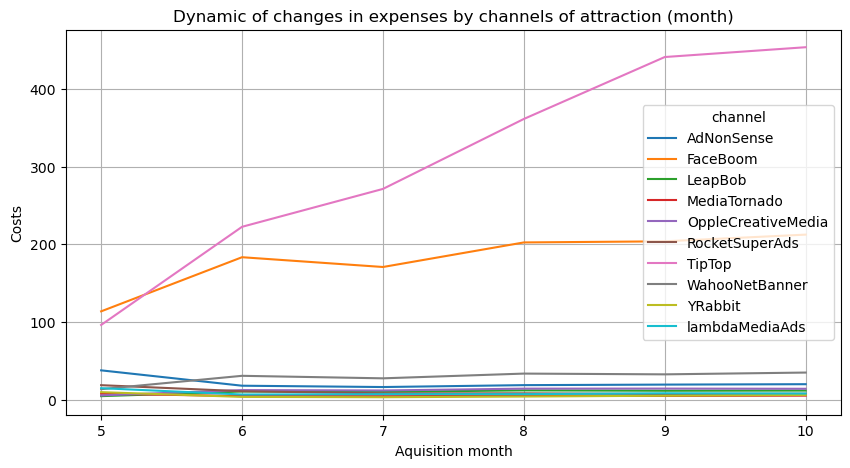

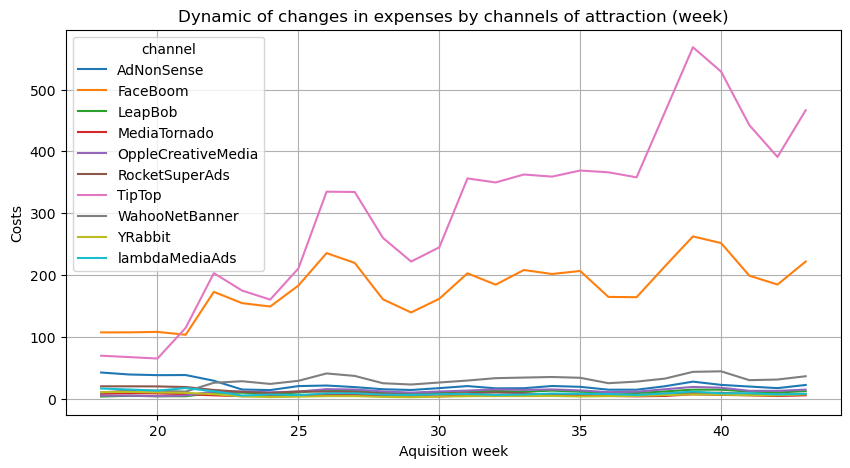

In [43]:
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='mean').plot(
    grid=True, figsize=(10, 5))
plt.ylabel('Costs')
plt.xlabel('Aquisition month')
plt.title('Dynamic of changes in expenses by channels of attraction (month)')

costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Costs')
plt.xlabel('Aquisition week')
plt.title('Dynamic of changes in expenses by channels of attraction (week)')

plt.show()

On the graphs, we can see that the cost of TipTop's attraction channel has risen from 80 to almost 500 (and at one point even more). 

Costs for the FaceBoom have also risen, but not as much, twice the initial rate. 

Costs for the other channels remained at their low positions. 


## 4.4. CAC for each source<a class="anchor" id="fourth4"></a>

Let's find out how much it cost on average to attract one user (CAC) from each source using user profiles. 

To calculate CAC (average cost of one user acquisition) we will call the function `get_ltv`, where CAC is calculated in the table `roi_history`. 

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])    

In [45]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


In [46]:
cac = roi_grouped[['cohort_size', 'cac']].sort_values(by="cac",  ascending= False)
cac

,cohort_size,cac
channel,,
TipTop,18498,2.757774
FaceBoom,27544,1.113419
AdNonSense,3702,1.008023
lambdaMediaAds,2056,0.727237
WahooNetBanner,8082,0.601856
RocketSuperAds,4251,0.417431
OppleCreativeMedia,8139,0.249908
MediaTornado,4167,0.219035
YRabbit,4102,0.217087


In [47]:
print('Average cost of attracting one user:', round(cac['cac'].mean(), 2))

Average cost of attracting one user: 0.75


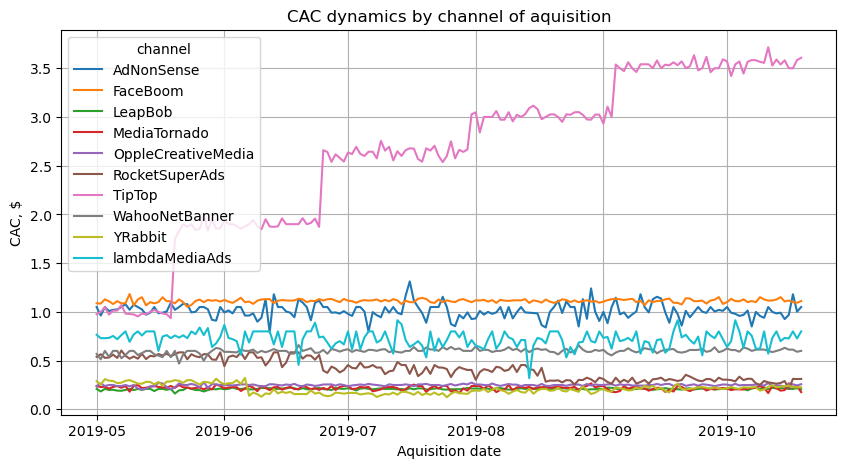

In [48]:
roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Aquisition date')
plt.title('CAC dynamics by channel of aquisition')
plt.show()

## 4.5. Marketing conclusions<a class="anchor" id="fourth5"></a>

A total of 105.497,30 was spent on advertising (a total of 10 paid advertising sources).

Most money goes to the TipTop channel, with FaceBoom on the second place. But FaceBoom brings in almost 8 times as many users (also paying) as TipTop (for the half of money that goes to TipTop).

Also TipTop channel costs continue to rise, but the graphs of trends with FaceBoom over time are very similar, with TipTop only having higher rates. 


САС (cost of one user acquisition) of almost all channels is at the same level, but TipTop rises by 0,5 points each month (avg. 2,76). FaceBoom has CAC = 1,11. 

# 5. Advertising payback<a class="anchor" id="fifth"></a>

Let's evaluate the payback of advertising. 


## 5.1. Advertising payback analysis using graphs<a class="anchor" id="fifth1"></a>

Let's analyse tha payback on advertising with the LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs. 

Remember, that by the terms of references we have our date now is **November 1st, 2019** and the business plan requires that users should be paid back no later than **two weeks** after they are attracted (analysis horizon). 

Organic users are not included in the analysis, because there was no fincancial costs to get them. 


In [49]:
# removing the organic users channel from the analysis 

profiles = profiles.query('channel != "organic"')

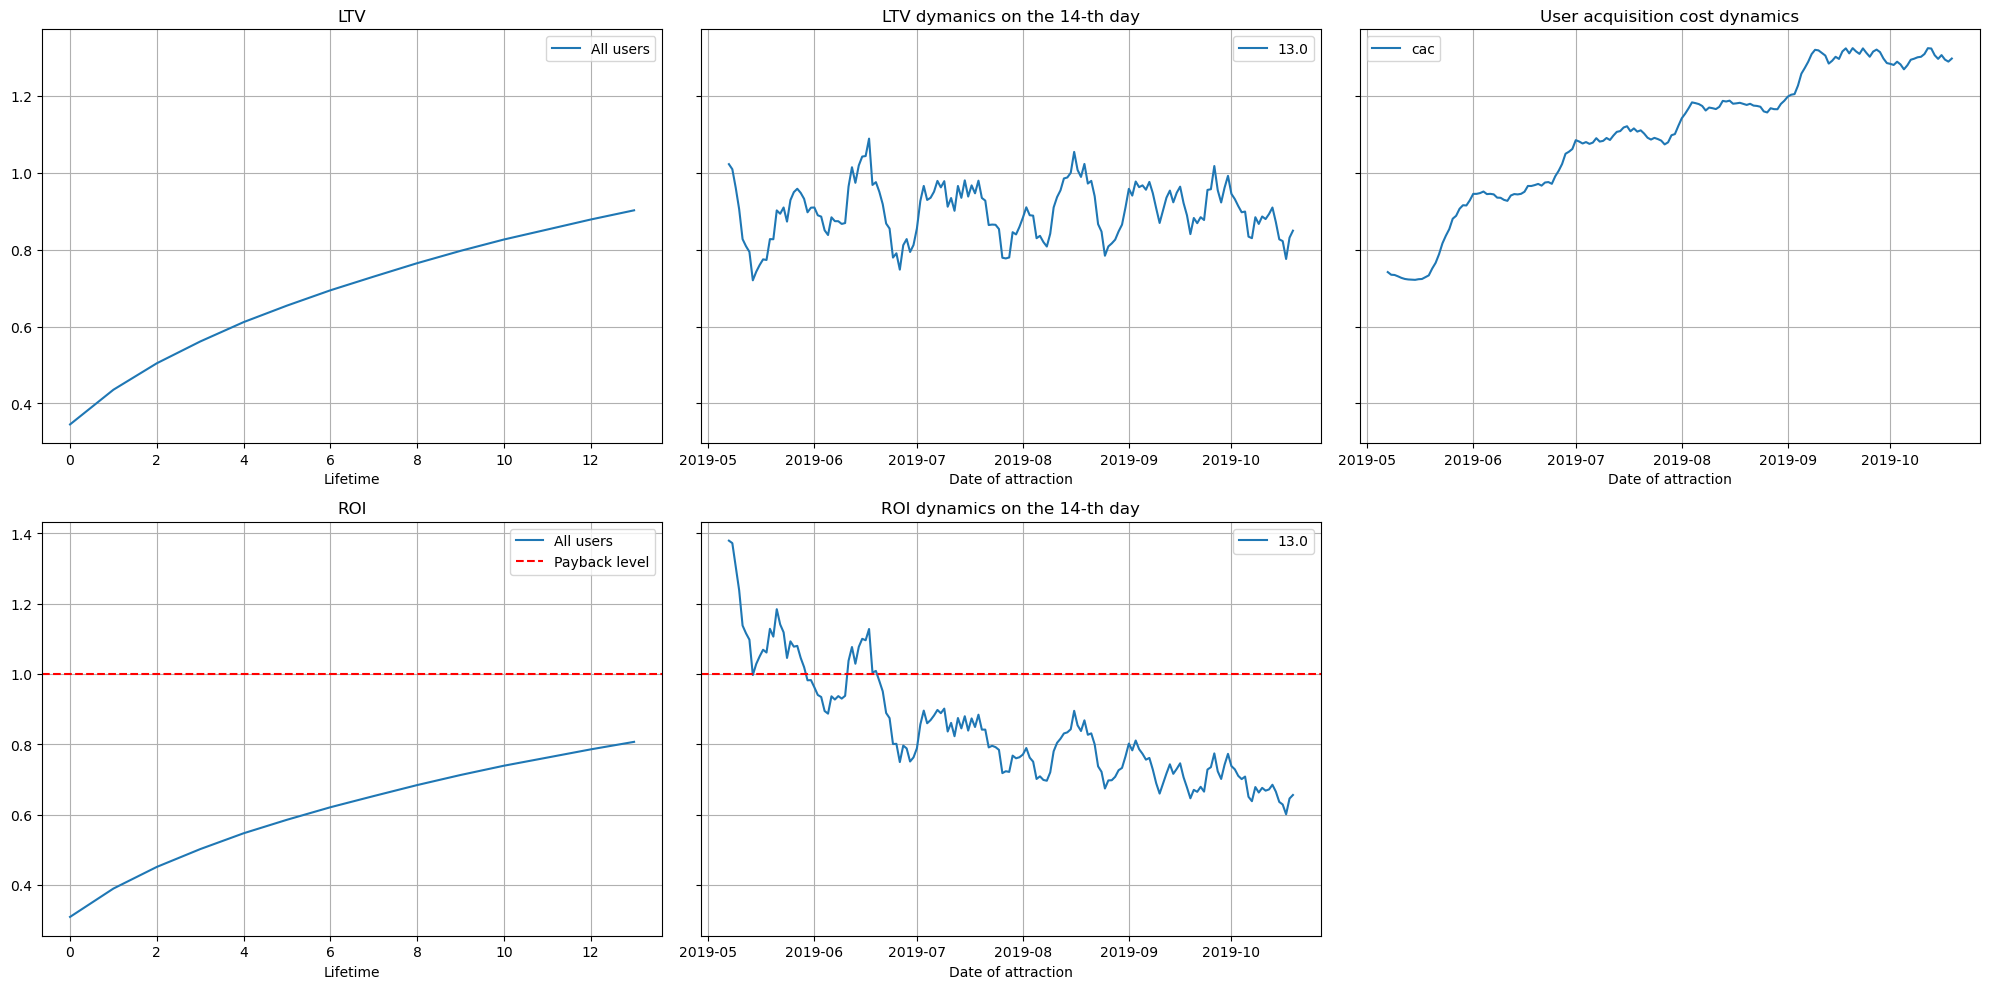

In [50]:
# calling the previously defined function, but without giving the dimensions parameter anything

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# calling the previously defined function for graphing

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

From the graphs we can make these conclusions: 
- LTV does not cross 1, but close to it
- CAC is not stable and rising (remember about our the most paid channel, which has a rising cost every month)
- Advertising is not paying off. The ROI at the end of the week is barely above 80%.
- And the graph of ROI dynamics at the end of two weeks generally falls. 


## 5.2. Conversion and user retention<a class="anchor" id="fifth2"></a>

Now let's check the conversion and user retention rates and how they are changing. 


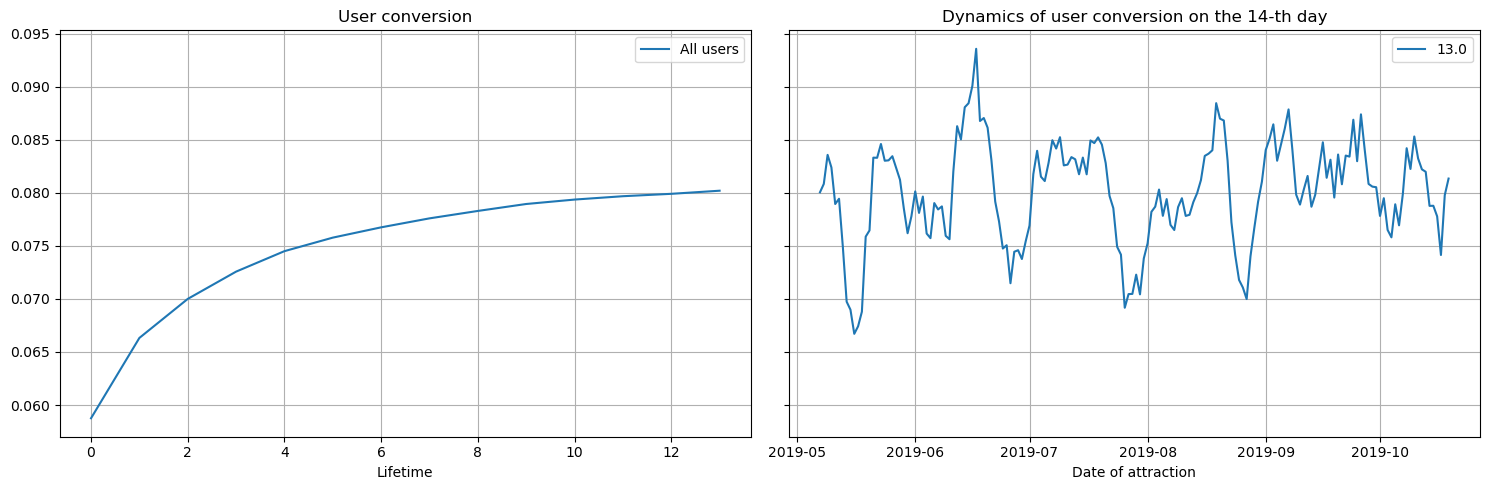

In [51]:
# calling the previously defined function for conversion and graphs 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

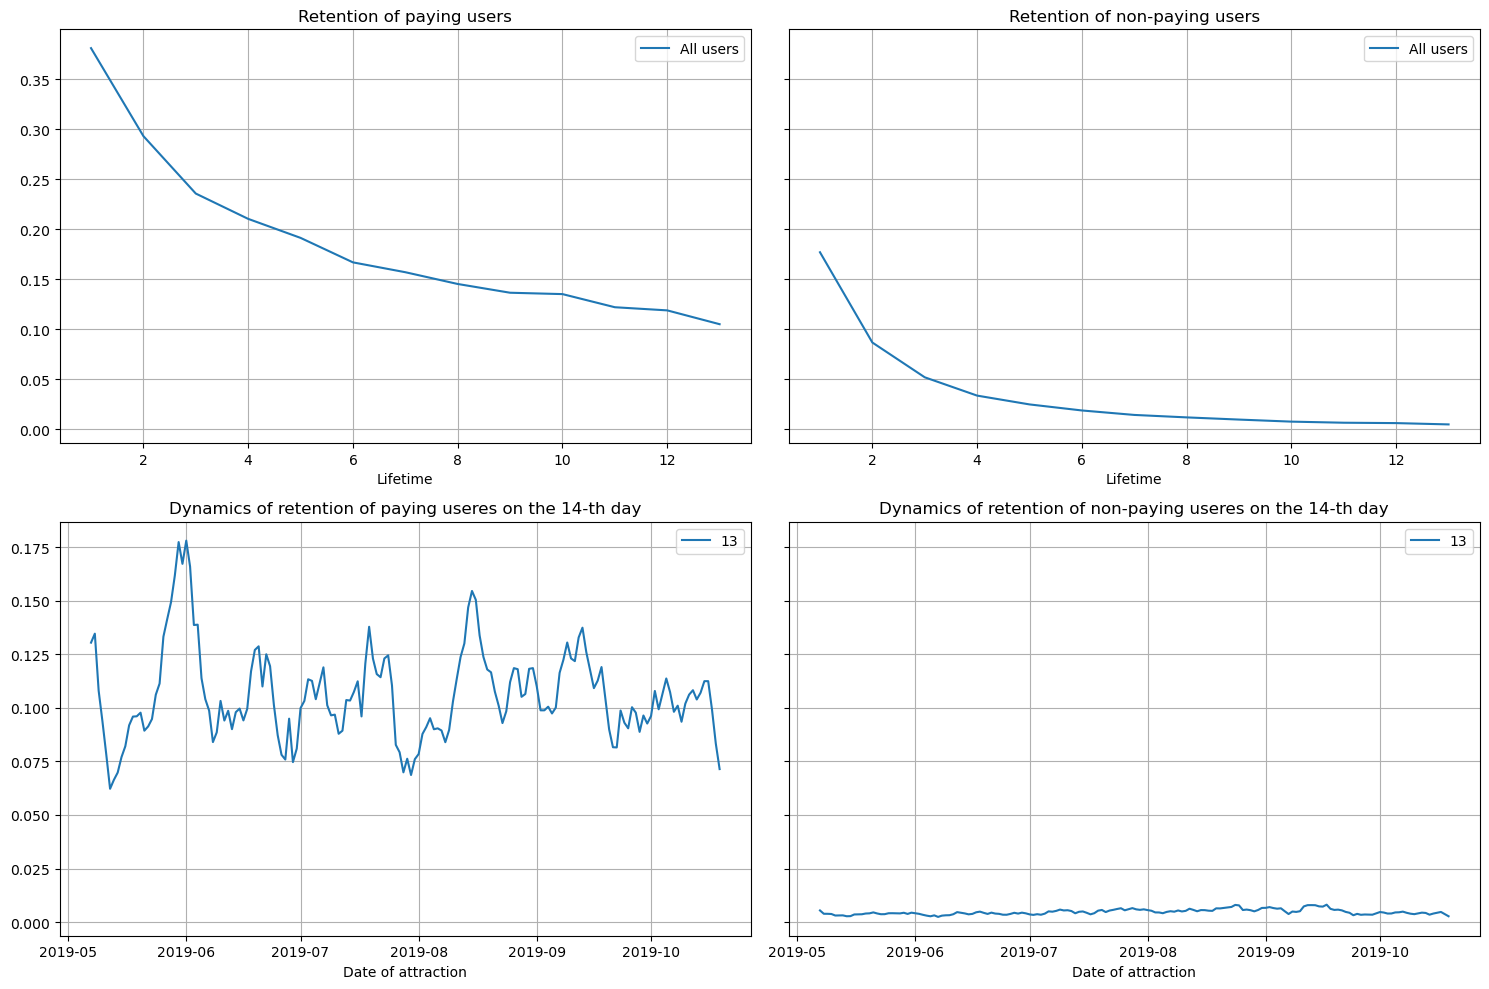

In [52]:
# calling the previously defined function for retention and graphs 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

The graphs show that user conversions are growing well, but the dynamics of both conversion and retention are jumping around too much. 

Retention of paying users falls by almost half, which is alarming.

It's better to look at this graphs again, but separately by country, devices and channels of attraction. 


## 5.3. Conversion and user retention by device<a class="anchor" id="fifth3"></a>


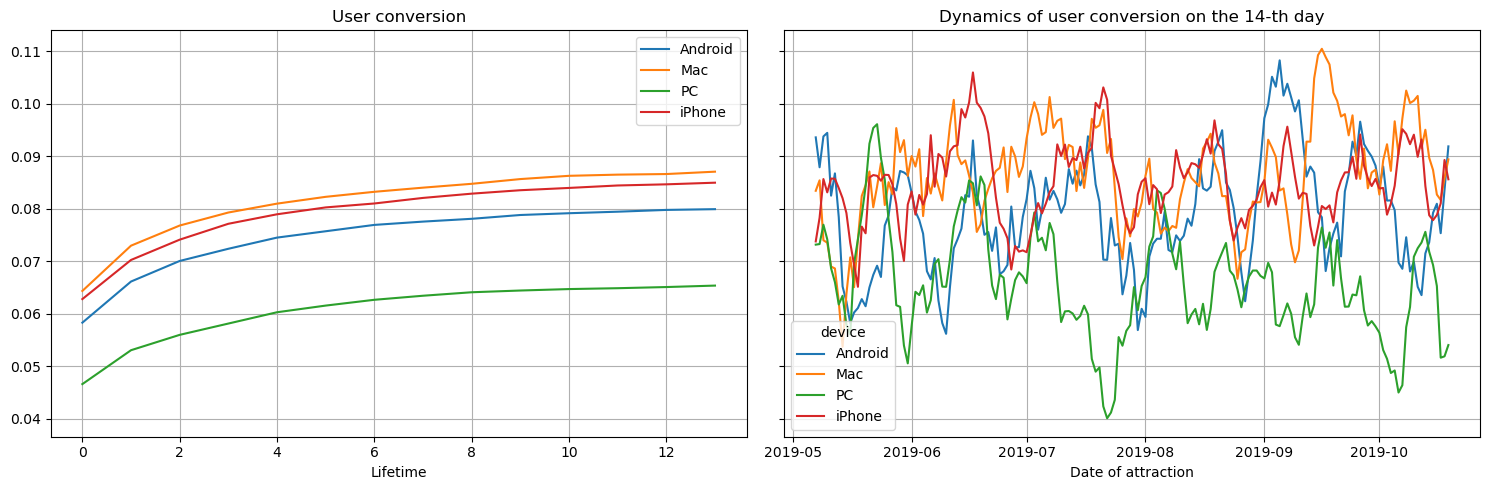

In [53]:
dimensions = ['device']

# calling the previously defined function for conversion and graphs 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

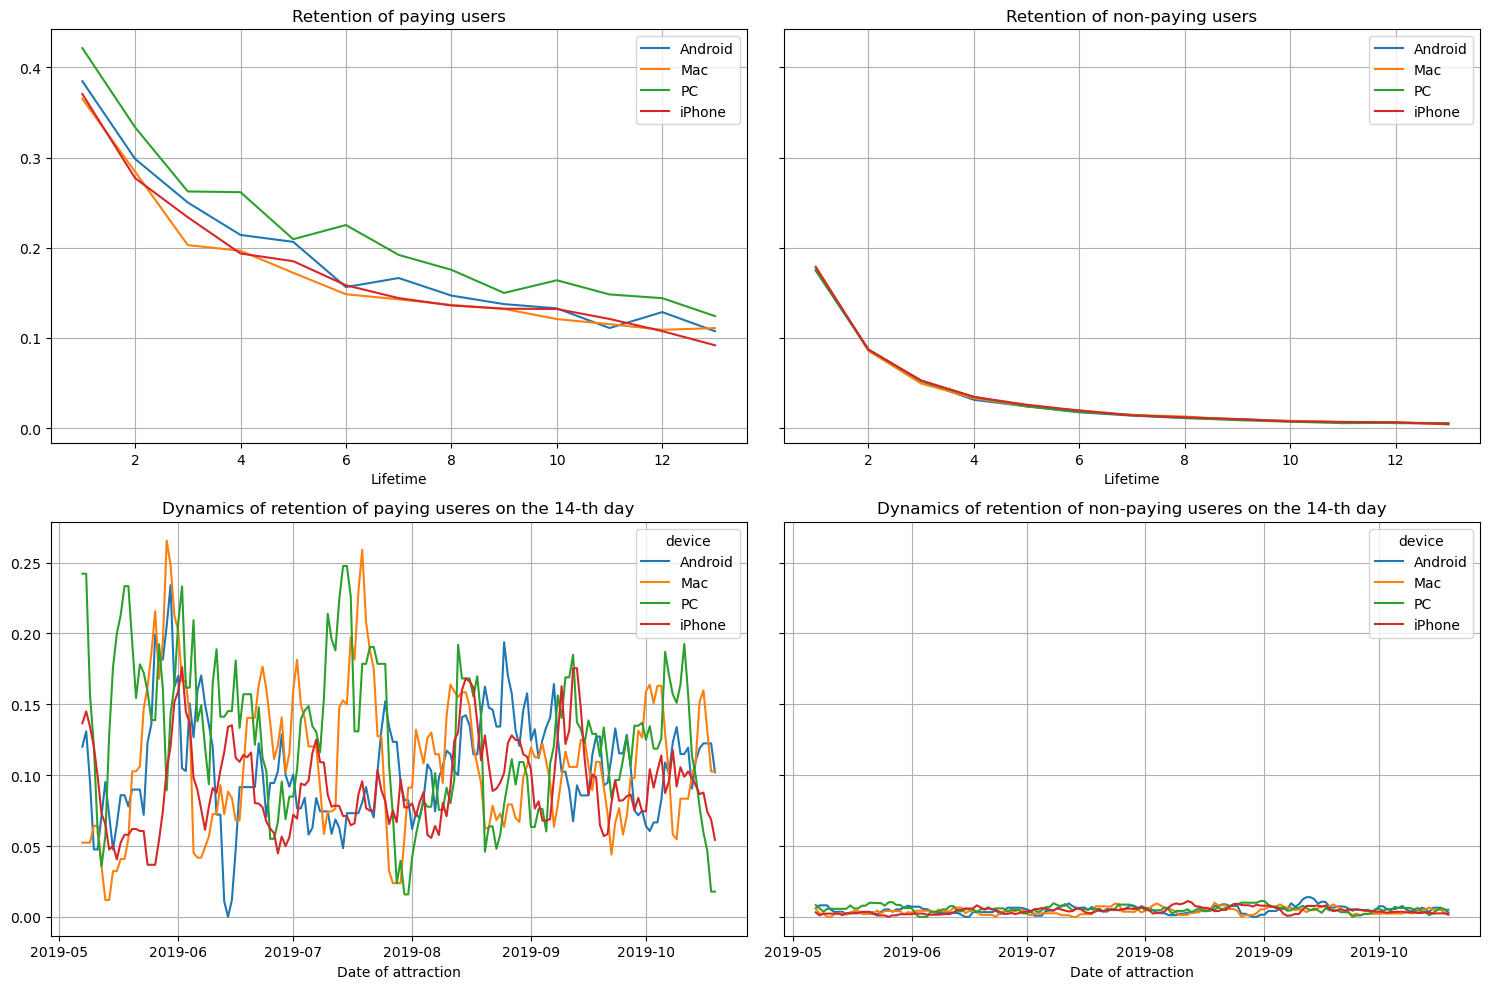

In [54]:
# calling the previously defined function for retention and graphs 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

A breakdown by device shows us nothing new, so let's check futher.

Let's split now by country. 


## 5.4. Conversion and user retention by country<a class="anchor" id="fifth4"></a>


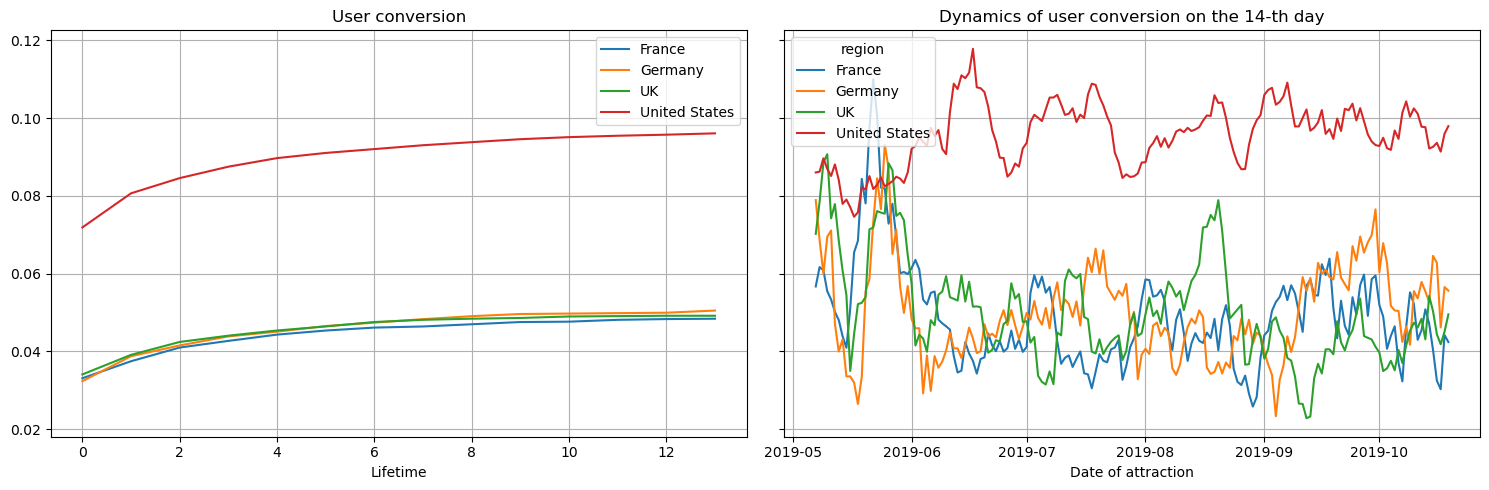

In [55]:
dimensions = ['region']

# calling the previously defined function for conversion and graphs 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

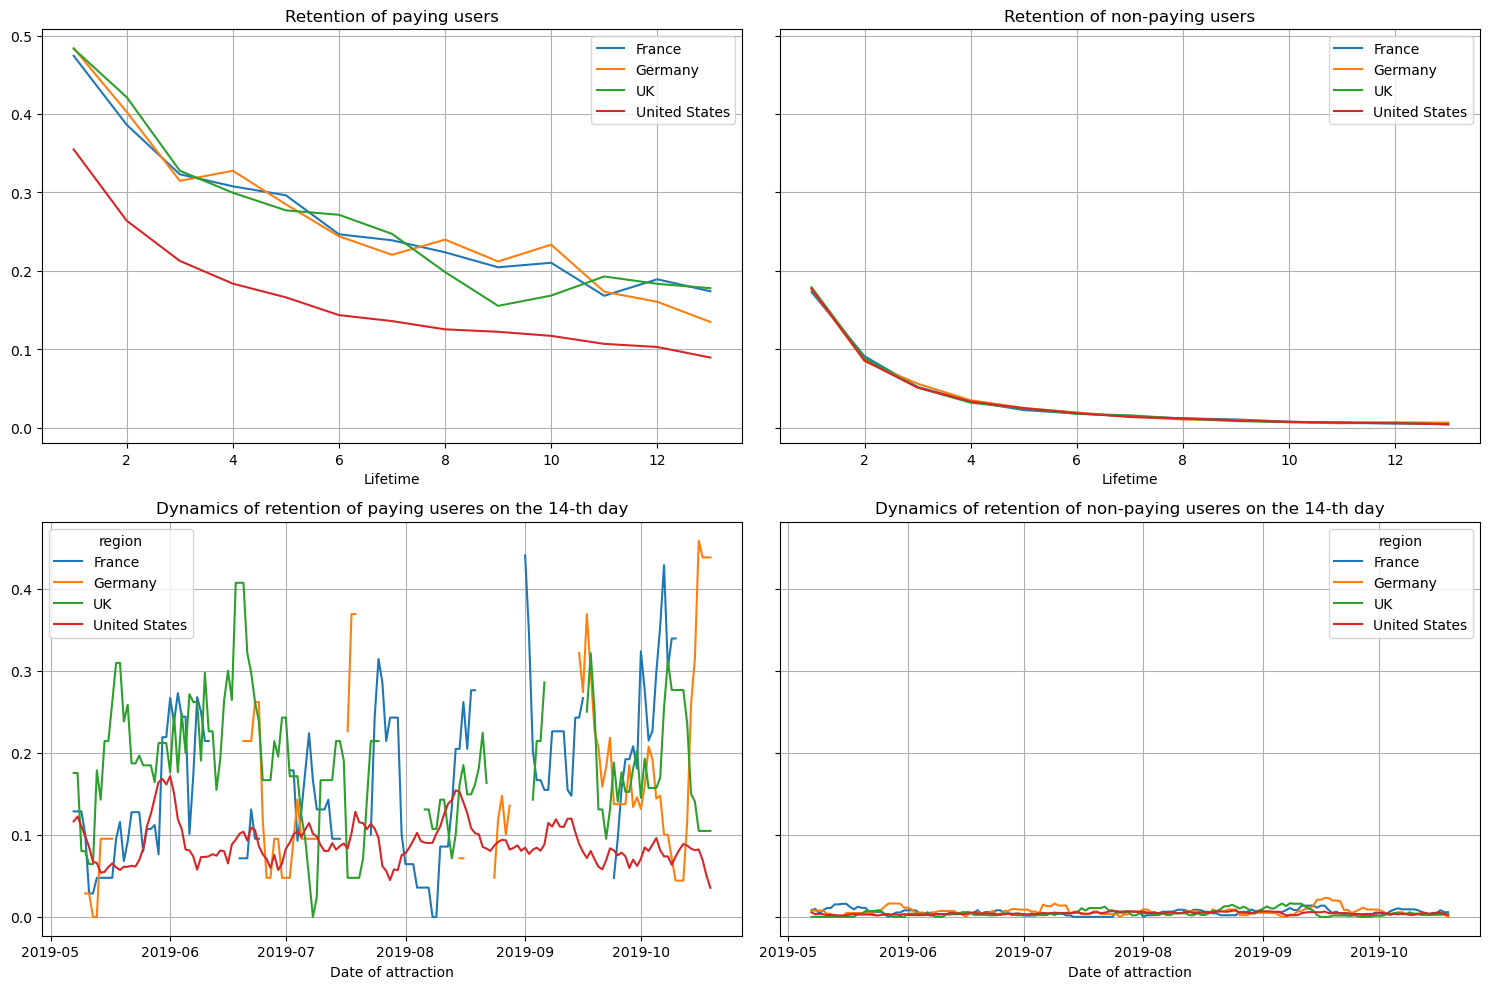

In [56]:
# calling the previously defined function for retention and graphs 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

Here's where it gets interesting, the US is much higher in conversion, but also has a worse retention rate (but the sample for that region is several times larger). 


## 5.5. Conversion and user retention by channel<a class="anchor" id="fifth5"></a>


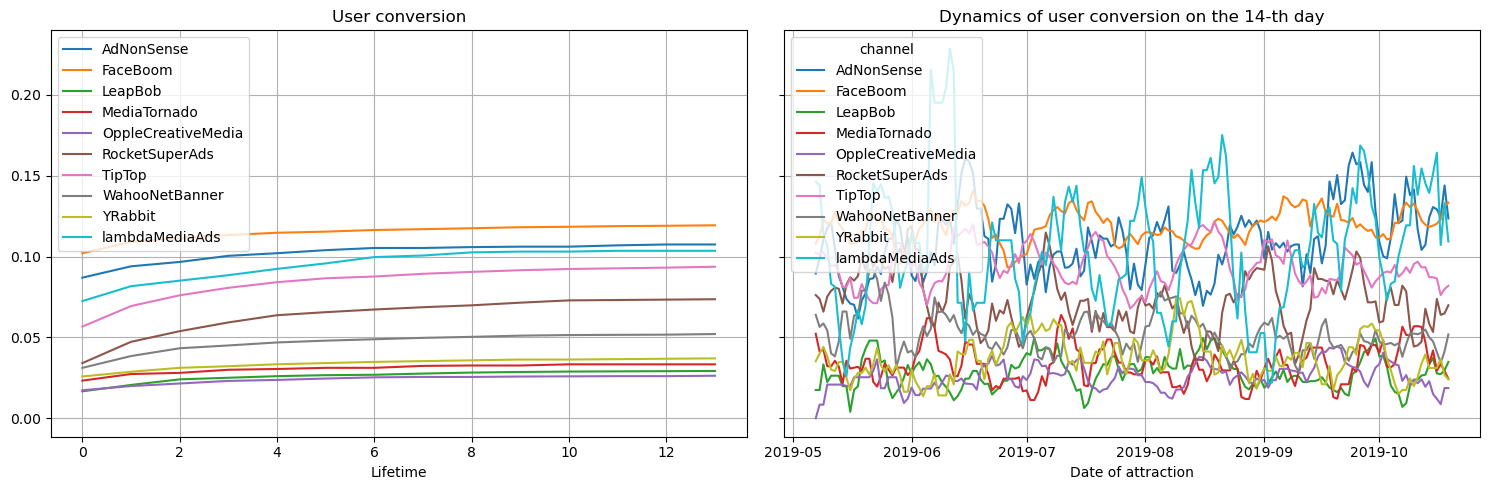

In [57]:
dimensions = ['channel']

# calling the previously defined function for conversion and graphs 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

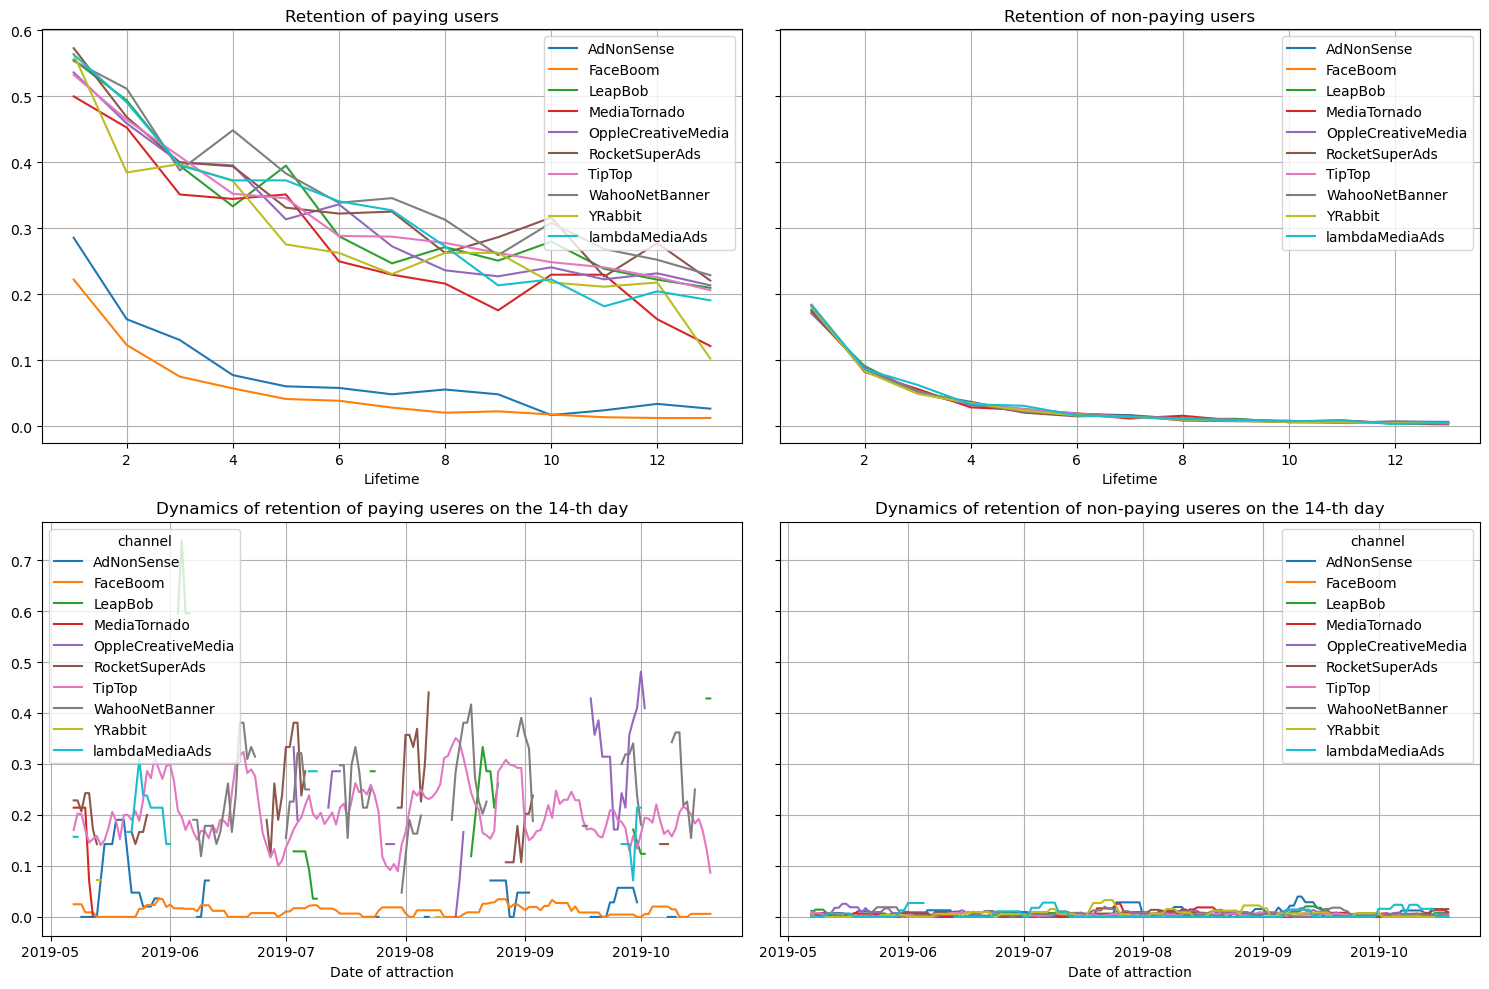

In [58]:
# calling the previously defined function for retention and graphs  

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

We see that, in fact, all user acquisition channels have a very low conversion rate, at 0,10. 


FaceBoom, AdNonSense and LambdaMediaAbs - are in the first three places, but the most expensive TipTop is only in fourth place. 

And in terms of retention, however, FaceBoom and LambdaMediaAbs do the worst. TipTop is at the level of all low-paid channels. 


## 5.6. Advertising payback analysis by device<a class="anchor" id="fifth6"></a>

We need to answer these questions:
- Does advertising directed at attracting new users in general pay off? 
- Which devices, counties and channels can have a negative impact on ROI? 
- What might be causing the payback problems?


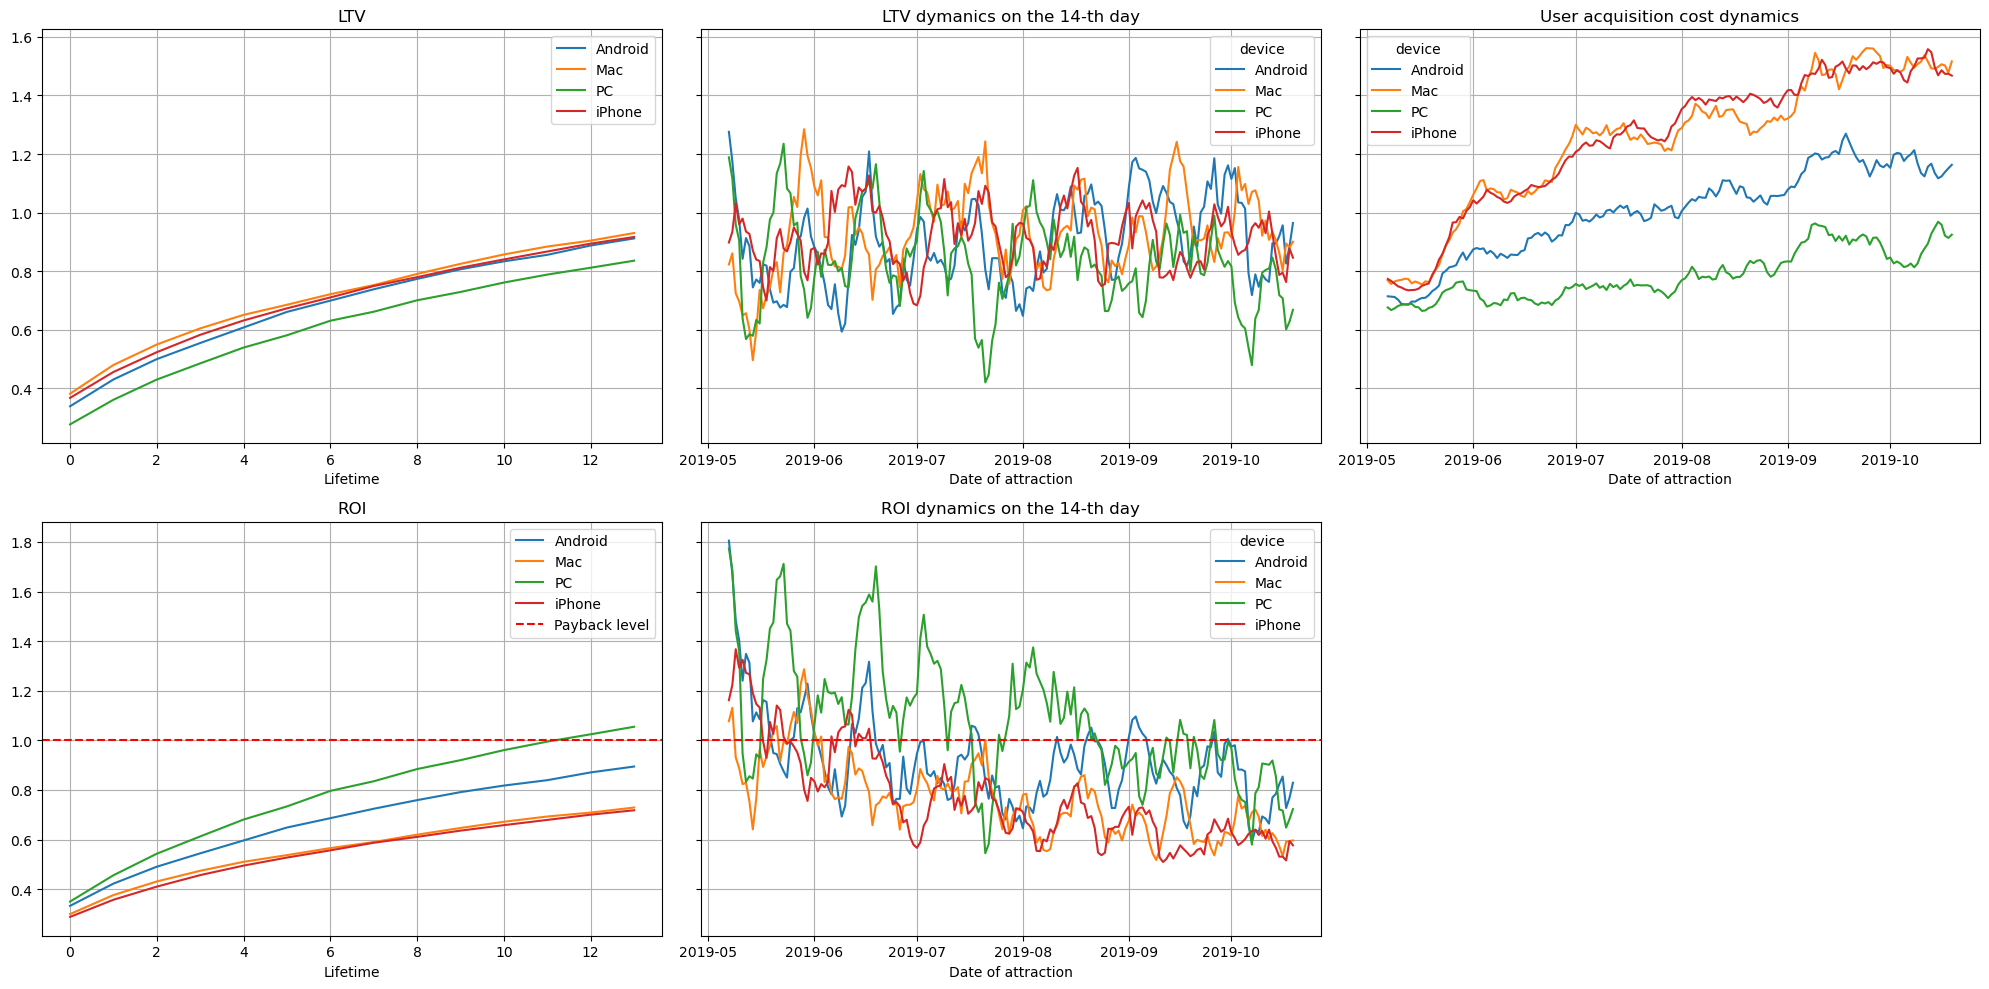

In [59]:
dimensions = ['device']

#calling the previously defined function for metrics
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

#calling the previously defined function for graphs  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

And we can clearly see that ROI curve has only crossed the payback level for PCs, but iPhones and Macs unfortunately lag behind. But this is evident in the graph of the cost of acquisition dynamics, it is for iPhone and Mac that the cost rises the most (almost double from the entry level). 


## 5.7. Advertising payback analysis by country<a class="anchor" id="fifth7"></a>

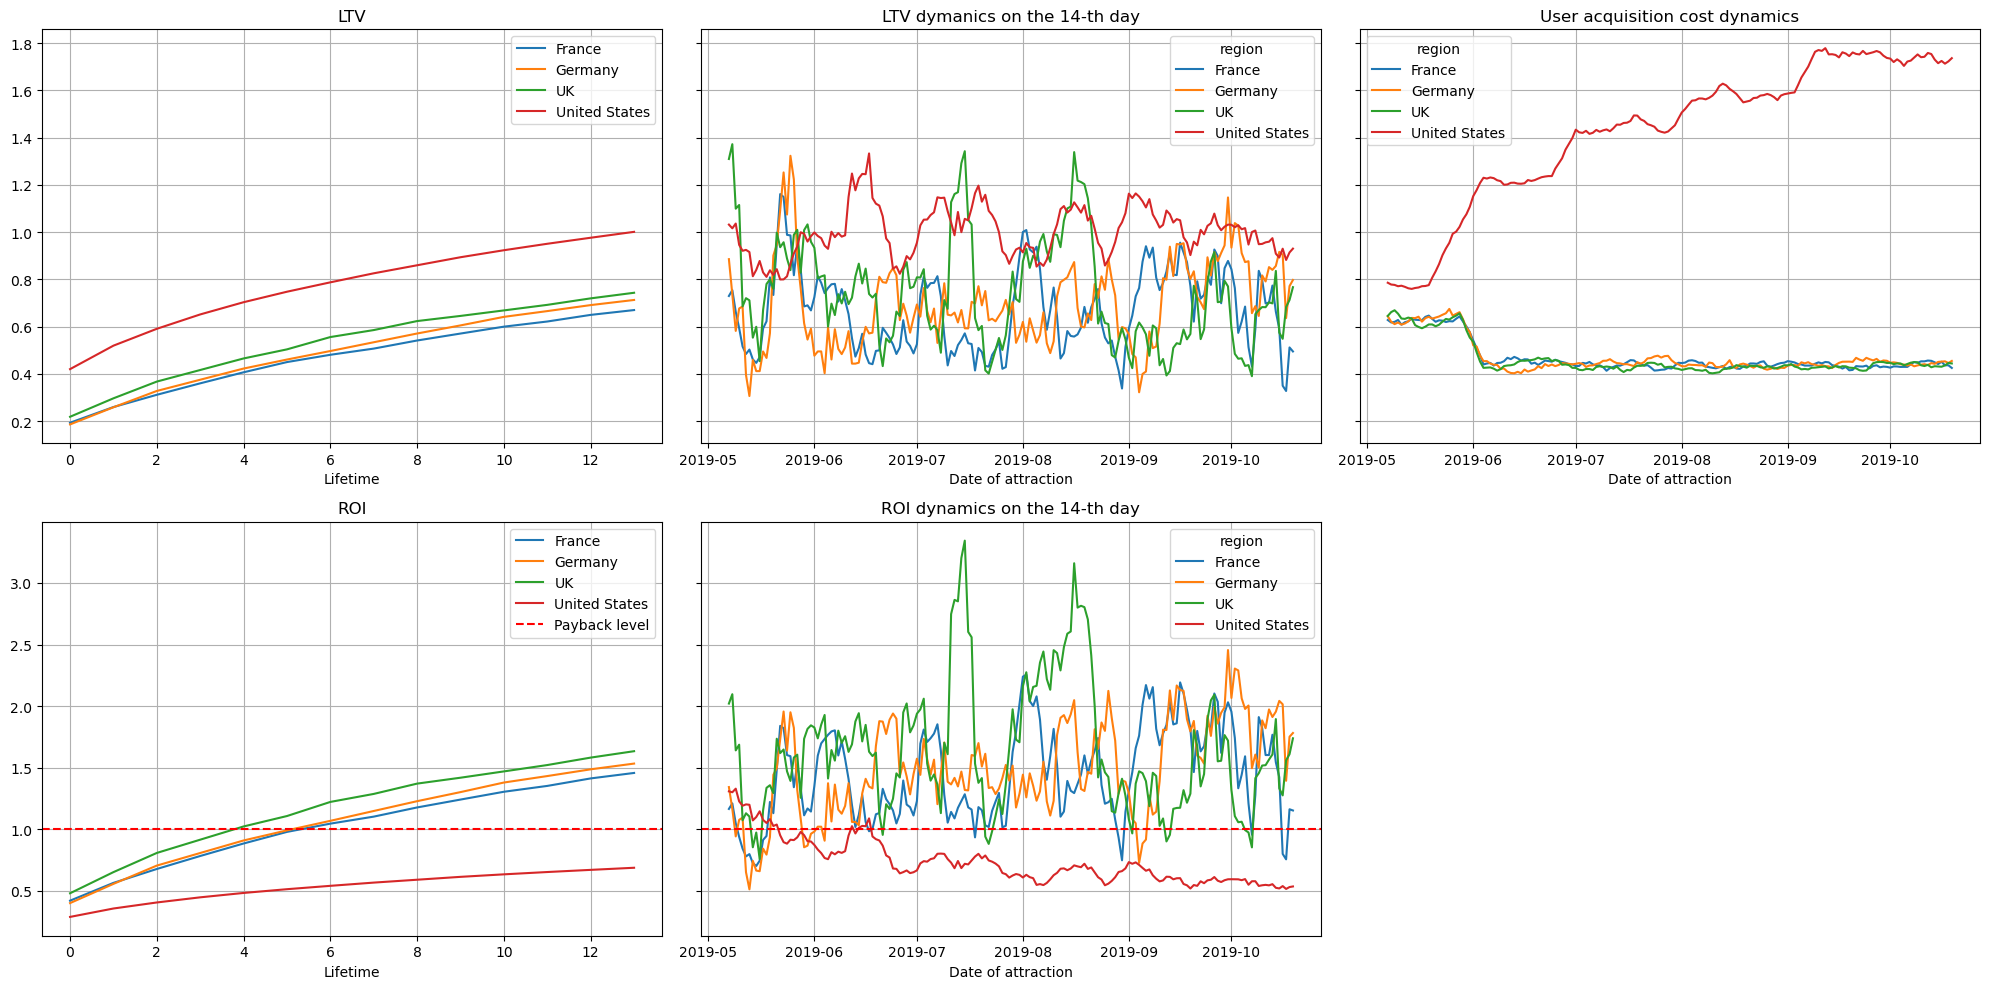

In [60]:
dimensions = ['region']

#calling the previously defined function for metrics
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

#calling the previously defined function for graphs  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Remember that we were shown graphs of user retention and rebound in the US, adding new information now: 

- LTV is highest in the US, and only the US came close to 1;
- The ROI of all other regions have crossed the payback level and by the end of second week are at 1.5 point, but in the US only about 0.7;
- And the dynamics of the costs of user acquisition in all countries decreased in June, but in the US it is increasing decently (repeating the graph  of the TipTop channel's cost increase). 

We have identified the most problematic region - the USA. Now we have to check with a breakdown by advertising channel. 


## 5.8. Advertising payback analysis by channel<a class="anchor" id="fifth8"></a>

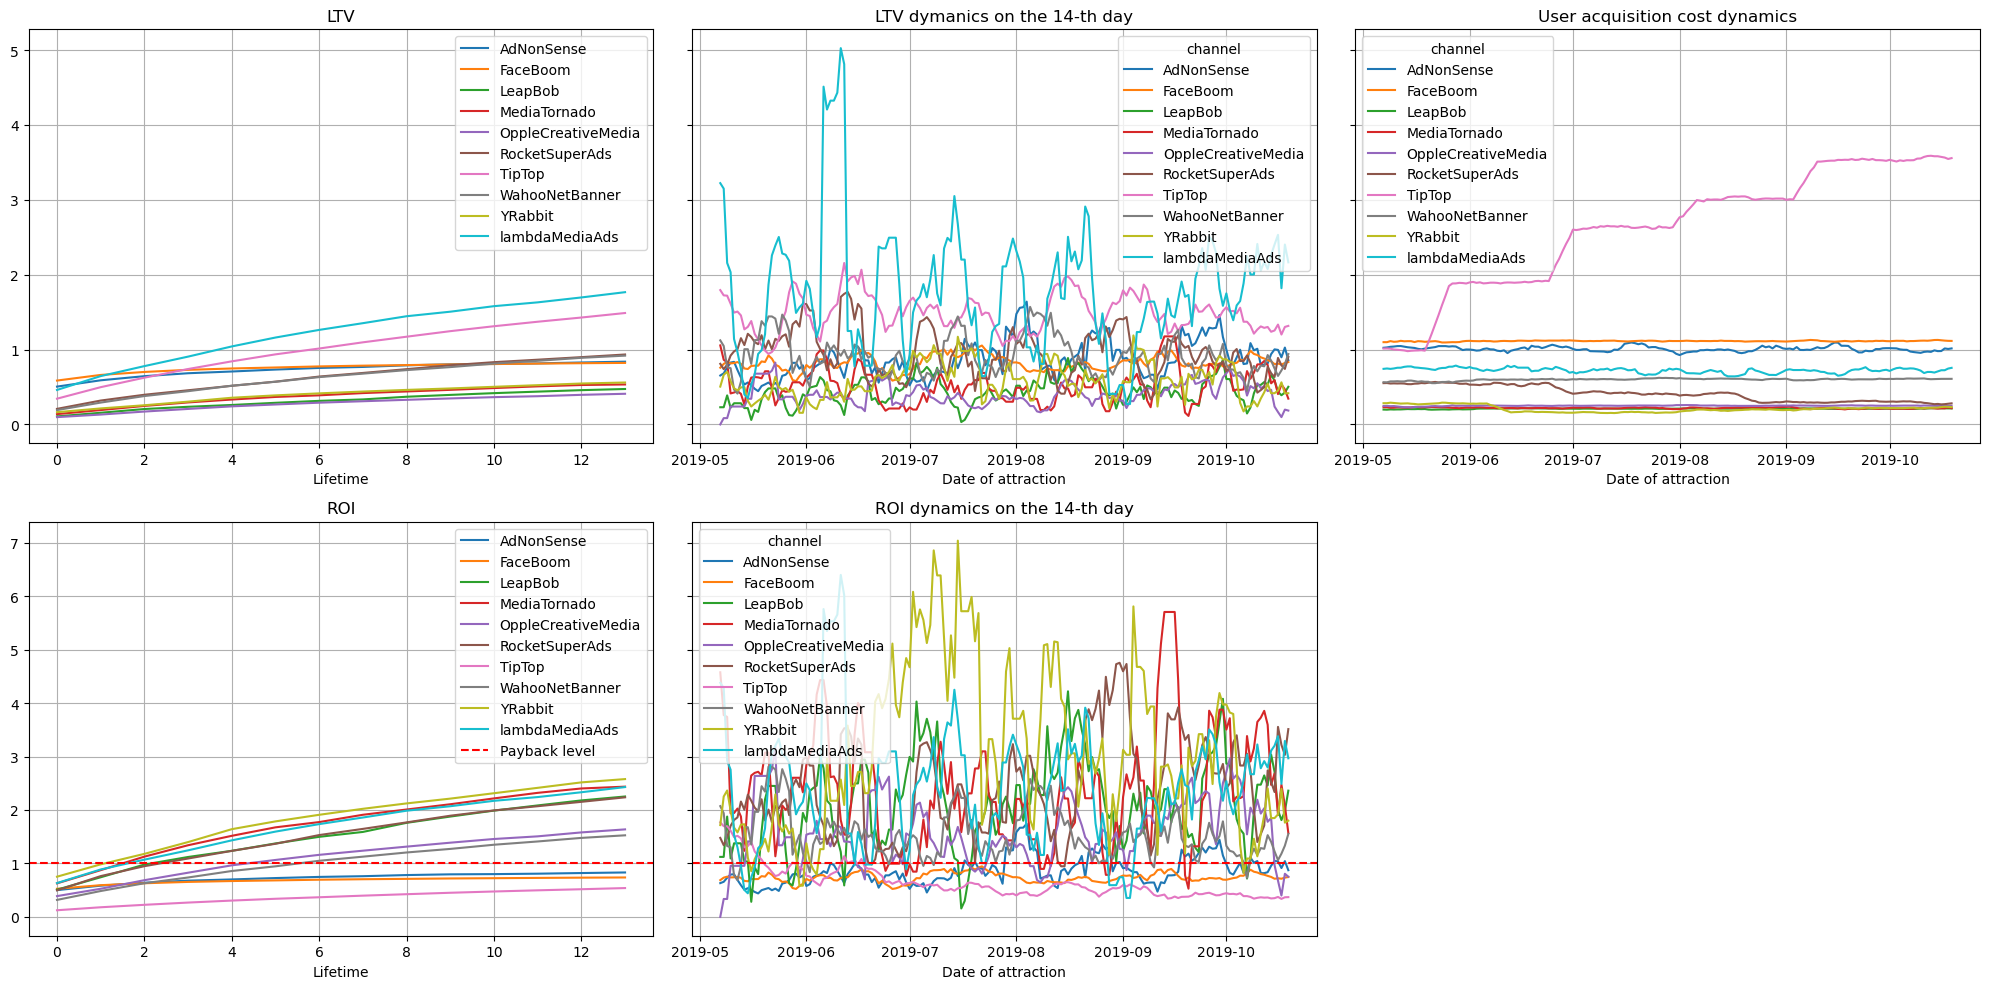

In [61]:
dimensions = ['channel']

#calling the previously defined function for metrics
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

#calling the previously defined function for graphs  
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

And now we can see that with this constantly rising cost, TipTop doesn't even cross the ROI payback line (it's even below all the others).


But the LTV is highest for TipTop and for lambdaMediaAbs. 

The channels that didn't pay off: 
- TipTop
- FaceBoom
- AdNonSense

## 5.9. Popularity of the app in general<a class="anchor" id="fifth9"></a>

Also let's check how populat the product is in the market and how much time and sessions users spend in the app. 


In [62]:
# determining the year and the month of the session
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month

# finding the number of sessions and the number of users
sessions_per_user = visits.groupby(['channel', 'session_month']).agg(
    {'user_id': ['count', 'nunique']})

# renaming 
sessions_per_user.columns = ['n_sessions', 'n_users']

# deviding the number of sessions by the number of users 
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

sessions_per_user

n_sessions  n_users  sessions_per_user
channel    session_month                                        
AdNonSense 5                    1871     1178           1.588285
           6                     984      673           1.462110
           7                     899      624           1.440705
           8                    1064      726           1.465565
           9                    1033      723           1.428769
...                              ...      ...                ...
organic    6                   14999     9237           1.623796
           7                   15419     9180           1.679630
           8                   17623    10618           1.659729
           9                   17561    10778           1.629338
           10                  17772    10341           1.718596

[66 rows x 3 columns]

In [63]:
sessions_per_user.groupby('channel').agg({'sessions_per_user': 'mean'})

,sessions_per_user
channel,
AdNonSense,1.474694
FaceBoom,1.501068
LeapBob,1.657352
MediaTornado,1.611167
OppleCreativeMedia,1.641912
RocketSuperAds,2.058674
TipTop,2.090984
WahooNetBanner,1.912014
YRabbit,1.647596


In [64]:
visits['session_duration_sec'] = (
    visits['session_end'] - visits['session_start']).dt.seconds

visits.groupby('channel').agg({'session_duration_sec': 'mean'})

,session_duration_sec
channel,
AdNonSense,1782.369758
FaceBoom,1801.115846
LeapBob,1801.976195
MediaTornado,1780.264474
OppleCreativeMedia,1777.902346
RocketSuperAds,1811.027821
TipTop,1812.314596
WahooNetBanner,1765.900122
YRabbit,1837.695018


In [73]:
print("Median duration of the session:", int(visits['session_duration_sec'].median()/60), "minutes") 

print("Mean duration of the session:", int(visits['session_duration_sec'].mean()/60), "minutes") 

Median duration of the session: 20 minutes
Mean duration of the session: 30 minutes


On average, one user has one session per month, about 30 minutes long. 

But one or two sessions per person for an entertaiment app is a quite small timing, and it is also worth considering how to improve this indicator. 

And also check user activity, such as number of unique users per day, per week and how many users are "stuck" in the app. 

In [66]:
# adding the start time of the session

visits['session_week'] = visits['session_start'].dt.isocalendar().week
visits['session_date'] = visits['session_start'].dt.date

visits.head(5)

,user_id,region,device,channel,session_start,session_end,session_year,session_month,session_duration_sec,session_week,session_date
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,2019,5,540,18,2019-05-01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,2019,5,64,18,2019-05-01
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,2019,5,4963,18,2019-05-01
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,2019,5,1466,18,2019-05-01
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,2019,5,1445,18,2019-05-01


In [67]:
# counting dau, wau and sticky factor
dau_total = (
    visits.groupby('session_date').agg({'user_id': 'nunique'}).mean())

wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'user_id': 'nunique'})
    .mean())

print("Number of unique users per day:", int(dau_total))
print("Number of unique users per week:", int(wau_total)) 
print("Sticky factor:", int(dau_total / wau_total * 100))

Number of unique users per day: 1684
Number of unique users per week: 8353
Sticky factor: 20


## 5.10. Payback Conclusions<a class="anchor" id="fifth10"></a>

In general, advertising focused on attracting users does not pay for itself over the study period, with an ROI at the end of the week of barely over 80%. 

All user aquisition channels have a very low conversion rate, at 0.10. 


- FaceBoom, AdNonSense and LambdaMediaAbs - are in the first three places, but the most expensive TipTop is only in fourth place. 
- In terms of retention, however, FaceBoom and LambdaMediaAbs do the worst. TipTop is at the level of all low-paid channels. 

The most problematic region - the USA (way above other countries in conversion rates, but the USA retention rate is also worse). Even if the US has an LTV close to 1, the increasing costs of aquisitionusers has not paid off. 

The ROI of all other regions have crossed the payback level and by the end of second week are at 1.5 point, but in the US only about 0.7. 

And we can clearly see that ROI curve has only crossed the payback level for PCs, but iPhones and Macs unfortunately lag behind. But this is evident in the graph of the cost of acquisition dynamics, it is for iPhone and Mac that the cost rises the most (almost double from the entry level).


* Number of unique users per day: 1684
* Number of unique users per week: 8353
* On average, there is one session per user per month, about 30 minutes long
 
The most unproductive acquisition channel that the advertising department should pay attention to is TipTop. It was the only one that kept raising the costs for its services without bringing a decent result. 
 
They should also pay attention to users from USA.  

# 6. General conclusions<a class="anchor" id="sixth"></a>

**1. Preprocessing**

We worked with three dataframes (visits, orders and ad costs), all of them were without missing values, without duplicates, we only put the data that stores the time in a suitable format to make it easier to work with later.
Also renamed the columns to snake_case.
The data are from the period from 1 May 2019 to 31 October 2019.

* Users of the app are located in the following countries: USA, UK, France and Germany.
* Users of the app use the following platforms: iPhone, Android, PC and Mac.
* There are 11 advertising channels (10 of them are paid)

**2. Functions**

We have set up functions for creating user profiles, calculating conversion and retention, LTV and ROI: get_profiles(), get_retention(), get_conversion() and get_ltv(). 

And also functions for plotting graphs: filter_data(), plot_retention(), plot_conversion() and plot_ltv_roi().


**3. EDA**

We define: 
* observation date - November 1, 2019,
* horizon days - 2 weeks = 14 days
* maximum possible date of user aquisition: October 19, 2019
* minimum possible date of user aquisition: May 1, 2019

*Users by countries:*
* The most of all, the app is used in the USA, where is the largest share of payers is also - 6,9% (but the sample is also several times larger).
* The UK and France with almost identical rates - number of users is about 17.500 and payers about 3,8%.
* And Germany has the least number of users (almost 15.000), but the share of paying users is higher than in the UK or France - 4,1%.

*Users by devices:*
* Users, who prefer Apple products (6,3% and 6,2%) pay more than Android and PC users (5,8% and 5,0%).

*Users by channel of aquisition:*
* The most users came by natural and free way (organic channel), with FaceBoom on the second place and TipTop in third. The most paying users came from the channels: FaceBoom, AdNonSense, lambdaMediaAds (paying share of more than 12%, 11% and 10% accordingly).


**4. Marketing research**

A total of 105.497,30 was spent on advertising (a total of 10 paid advertising sources).

Most money goes to the TipTop channel, with FaceBoom on the second place. But FaceBoom brings in almost 8 times as many users (also paying) as TipTop (for the half of money that goes to TipTop).

Also TipTop channel costs continue to rise, but the graphs of trends with FaceBoom over time are very similar, with TipTop only having higher rates.

САС (cost of one user acquisition) of almost all channels is at the same level, but TipTop rises by 0,5 points each month (avg. 2,76). FaceBoom has CAC = 1,11.

The average CAC by all channels - 0.75.


**5. Advertising payback**

In general, advertising focused on attracting users does not pay for itself over the study period, with an ROI at the end of the week of barely over 80%. 

All user aquisition channels have a very low conversion rate, at 0.10. 


- FaceBoom, AdNonSense and LambdaMediaAbs - are in the first three places, but the most expensive TipTop is only in fourth place. 
- In terms of retention, however, FaceBoom and LambdaMediaAbs do the worst. TipTop is at the level of all low-paid channels. 

The most problematic region - the USA (way above other countries in conversion rates, but the USA retention rate is also worse). Even if the US has an LTV close to 1, the increasing costs of aquisitionusers has not paid off. 

The ROI of all other regions have crossed the payback level and by the end of second week are at 1.5 point, but in the US only about 0.7. 

And we can clearly see that ROI curve has only crossed the payback level for PCs, but iPhones and Macs unfortunately lag behind. But this is evident in the graph of the cost of acquisition dynamics, it is for iPhone and Mac that the cost rises the most (almost double from the entry level).


* Number of unique users per day: 1684
* Number of unique users per week: 8353
* On average, there is one session per user per month, about 30 minutes long
 
The most unproductive acquisition channel that the advertising department should pay attention to is TipTop. It was the only one that kept raising the costs for its services without bringing a decent result. 
 
They should also pay attention to users from USA.  

**Recommendations**

**The most important recommendation for the marketing department is to optimise the cost of acquiring new users.**

**The most unproductive acquisition channel is TipTop. It was the only one that kept raising the costs for its services without bringing a decent result. If it cannot be abandoned, at least limit the budget.**


**Also pay attention to users from USA, it is the most unprofitable region**

**The lambdaMediaAds (third place in terms of acquisition) and YRabbit have the best payback and retention rates, so it's better to focus on it.**

**It's also worth finding another channel that works better with the iPhone and Mac, as users who prefer these platforms are also the most paying ones.**


**Could also work with the European region and raise the level of paying users there, for example RocketSuperAds and WahooNetBanner (with ROI over the payback line and in the top five paying users (removing TipTop))** 